In [136]:
import numpy as np

In [181]:
def r(x):
    return 4*(x**2)-8*x+1
def p(x):
    return x
def q(x):
    return 4

In [182]:
def exact_sol(x):
    exact = x**2 - x
    return exact

In [183]:
n = 200
x_list = np.linspace(0,1,n+1)

In [184]:
x_list

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [185]:
h = np.array([0.1 for i in range(n+1)])

In [186]:
def basis_function(x, n):                               
    phi = np.zeros([n+1, n+1], dtype='float')                               #initialize basis function
    for j in range(n-1):             
        for idx in range(n):
            if (0<=x[idx]<=x[j-1]):
                phi[j, idx] = 0
            elif (x[j-1]<x[idx]<=x[j]):
                phi[j, idx] = (x[idx] - x[j-1])/h[j-1]
            elif (x[j]<x[idx]<=x[j+1]):
                phi[j, idx] = ((x[j+1] - x[idx])/h[j])
            elif (x[j+1]<x[idx]<=1):
                phi[j, idx] = 0
    return phi

In [187]:
#initialize vectors for computing integrals
Q1 = []
Q2 = []
Q3 = []
Q4 = []
Q5 = []
Q6 = []
#approximating the 6 integrals
for i in range(n-1):
    q1 = (h[i]/12)*(p(x_list[i]) + q(x_list[i+1]))
    Q1.append(q1)
    q2 = (h[i-1]/12)*(3*q(x_list[i]) + q(x_list[i-1]))
    Q2.append(q2)
    q3 = (h[i]/12)*(3*q(x_list[i]) + q(x_list[i+1]))
    Q3.append(q3)
    q4 = (h[i-1]/2)*(p(x_list[i]) + p(x_list[i-1]))
    Q4.append(q4)
    q5 = (h[i-1]/6)*(2*r(x_list[i]) + r(x_list[i-1]))
    Q5.append(q5)
    q6 = (h[i]/6)*(2*r(x_list[i]) + r(x_list[i+1]))
    Q6.append(q6)

In [188]:
#now compute  Q1,n , Q2,n , Q3,n , Q4,n Q4,n+1, Q5n, Q6,n
q1n = (h[n]/12)*(p(x_list[n-1]) + q(x_list[n]))
Q1.append(q1n)
q2n = (h[n-2]/12)*(3*q(x_list[n-1]) + q(x_list[n-2]))
Q2.append(q2n)
q3n = (h[n]/12)*(3*q(x_list[n-1]) + q(x_list[n]))
Q3.append(q3n)
q4n_last = (h[n-1]/2)*(p(x_list[n]) + p(x_list[n-1]))
q4n_second_last = (h[n-2]/2)*(p(x_list[n-1]) + p(x_list[n-2]))
Q4.append(q4n_second_last)
Q4.append(q4n_last)
q5n = (h[n-1]/6)*(2*r(x_list[n-1]) + r(x_list[n-2]))
Q5.append(q5n)
q6n = (h[n]/6)*(2*r(x_list[n-1]) + r(x_list[n]))
Q6.append(q6n)

In [189]:
alpha = np.zeros(n+1, dtype='float')
beta = np.zeros(n+1, dtype='float')
b = np.zeros(n+1, dtype='float')
a = np.zeros(n+1, dtype='float')
for i in range(n-1):
    alpha[i] = Q4[i] + Q4[i+1] + Q2[i] + Q3[i]
    beta[i] = Q1[i] - Q4[i+1]
    b[i] = Q5[i] + Q6[i]
alpha[n] = Q4[n-1] + Q4[n] + Q2[n-1] + Q3[n-1]
b[n] = Q5[n-1] + Q6[n-1]
a[0] = alpha[0]

In [190]:
#solve a symmetric tridiagonal linear system 
zeta = np.zeros(n+1, dtype='float')
z = np.zeros(n+1, dtype='float')
c = np.zeros(n+1, dtype='float')                      #the weights
zeta[0] = beta[0]/alpha[0]
z[0] = b[0]/a[0]
for i in range(1, n-1):
    a[i] = alpha[i] - beta[i-1]*zeta[i-1]
    zeta[i] = beta[i]/a[i]
    z[i] = (b[i] - beta[i-1]*z[i-1])/a[i]
a[n] = alpha[n] - beta[n-1]*zeta[n-1]
z[n] = (b[n] - beta[n-1]*z[n-1])/a[n]

In [191]:
#indices for the weights
#indices must be reversed
indices = []
for i in range(n):
    a =  n-1-i
    indices.append(a)
#print(indices)
c[n] = z[n]

for i in indices:
    c[i] = z[i] - zeta[i]*c[i+1]
u = basis_function(x_list,n)

In [192]:
#compute the error
error = np.zeros(n+1, dtype='float')
phi_new = np.dot(u, c)
exact_sol_ = []
for i in range(len(x_list)):
    error[i] = (abs(phi_new[i]-exact_sol(x_list[i])))
    print(phi_new[i],exact_sol(x_list[i]))
    exact_sol_.append(exact_sol(x_list[i]))

0.0 0.0
0.015842225403589302 -0.004975
0.013622358522223148 -0.0099
0.013226126629138265 -0.014775
0.012609786697846062 -0.0196
0.01202365766135704 -0.024375
0.011437634674651634 -0.029099999999999997
0.010855268787550566 -0.033775000000000006
0.010276145830155554 -0.038400000000000004
0.009700310151474212 -0.042975
0.009127754074470135 -0.0475
0.008558475716730653 -0.051975
0.007992472565779094 -0.0564
0.0074297421793197115 -0.060775
0.006870282110384595 -0.0651
0.006314089915175404 -0.06937499999999999
0.005761163152254421 -0.0736
0.005211499382622494 -0.07777500000000001
0.004665096169708179 -0.0819
0.0041219510793654695 -0.085975
0.0035820616798705896 -0.09
0.0030454255419191125 -0.093975
0.0025120402386229227 -0.0979
0.0019819033455071534 -0.101775
0.001455012440507259 -0.1056
0.0009313651039659964 -0.109375
0.0004109589186304115 -0.1131
-0.00010620853035111129 -0.116775
-0.000620139655431848 -0.12040000000000001
-0.001130836866669704 -0.12397499999999999
-0.0016383025717302208 -0

In [193]:
print(error)

[0.00000000e+00 2.08172254e-02 2.35223585e-02 2.80011266e-02
 3.22097867e-02 3.63986577e-02 4.05376347e-02 4.46302688e-02
 4.86761458e-02 5.26753102e-02 5.66277541e-02 6.05334757e-02
 6.43924726e-02 6.82047422e-02 7.19702821e-02 7.56890899e-02
 7.93611632e-02 8.29864994e-02 8.65650962e-02 9.00969511e-02
 9.35820617e-02 9.70204255e-02 1.00412040e-01 1.03756903e-01
 1.07055012e-01 1.10306365e-01 1.13510959e-01 1.16668791e-01
 1.19779860e-01 1.22844163e-01 1.25861697e-01 1.28832461e-01
 1.31756451e-01 1.34633665e-01 1.37464102e-01 1.40247757e-01
 1.42984630e-01 1.45674718e-01 1.48318018e-01 1.50914528e-01
 1.53464245e-01 1.55967168e-01 1.58423293e-01 1.60832619e-01
 1.63195143e-01 1.65510863e-01 1.67779776e-01 1.70001879e-01
 1.72177172e-01 1.74305650e-01 1.76387313e-01 1.78422157e-01
 1.80410180e-01 1.82351380e-01 1.84245754e-01 1.86093301e-01
 1.87894017e-01 1.89647900e-01 1.91354949e-01 1.93015160e-01
 1.94628532e-01 1.96195061e-01 1.97714747e-01 1.99187586e-01
 2.00613575e-01 2.019927

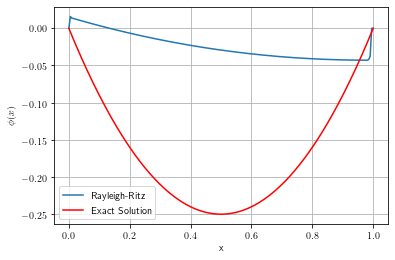

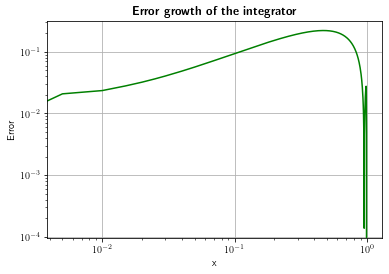

In [194]:
#plotting 
plt.grid()
plt.plot(x_list, phi_new,x_list,  exact_sol_, 'r')
plt.legend(['Rayleigh-Ritz', 'Exact Solution'])
plt.xlabel(r'x')
plt.ylabel(r'$\phi(x)$')
plt.savefig('Results')
plt.show()

plt.grid()
plt.loglog(x_list,error, 'g')
plt.title(r'\textbf{Error growth of the integrator}')
plt.xlabel(r'x')
plt.ylabel(r'Error')
plt.savefig('Error')
plt.show()

                 0
0.000000  0.012857
0.074017  0.074017
0.147680  0.147680
0.221335  0.221335
0.294774  0.294774
...            ...
0.294773  0.294773
0.221326  0.221326
0.146867  0.146867
0.000000  0.000000
0.000000  0.072254

[101 rows x 1 columns]


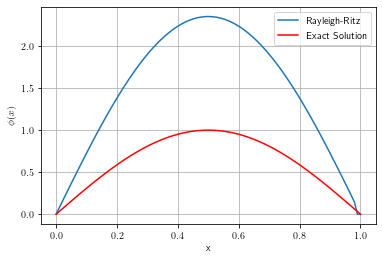

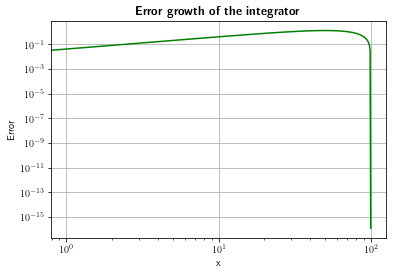

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True



'''I use the piecewise linear Rayleigh-Ritz method to solve a second order  ordinary differential equation with a nonzero RHS
The d.e is of the form :  - d/dx(  p(x)dy/dx) + q(x)y = f(x).
The integration is performed on the interval 0<=x<=1'''

def rhs(x):
    '''This computes the rhs of the d.e.
    INPUT: the variable x'''
    return 2*(np.pi**2)*np.sin(np.pi*x)
N =100
x = np.linspace(0,1, N+1)

h = []          #intialize space step
h0 = x[1] - x[0]
h.append(h0)
for i in range(N-1):
        h.append(x[i+1] - x[i])
hN = x[N] - x[N-1]
h.append(hN)
def basis_function(x):
    '''Basis functions of the Rayleigh-Ritz method'''
                                    
    phi = np.zeros([N+1, N+1], dtype='float')                               #initialize basis function
    for j in range(N-1):             
        for idx in range(N):
            if (0<=x[idx]<=x[j-1]):
                phi[j, idx] = 0
            elif (x[j-1]<x[idx]<=x[j]):
                phi[j, idx] = (x[idx] - x[j-1])/h[j-1]
            elif (x[j]<x[idx]<=x[j+1]):
                phi[j, idx] = ((x[j+1] - x[idx])/h[j])
            elif (x[j+1]<x[idx]<=1):
                phi[j, idx] = 0
    return phi
#basis_function(x)

#coefficient functions 
def p(x):
    '''Defining the coefficient p in the d.e.'''
    return 1

def q(x):
    '''Defining the coefficient q in the d.e.'''
    return np.pi**2
#initialize vectors for computing integrals
Q1 = []
Q2 = []
Q3 = []
Q4 = []
Q5 = []
Q6 = []
#approximating the 6 integrals
for i in range(N-1):
    q1 = (h[i]/12)*(p(x[i]) + q(x[i+1]))
    Q1.append(q1)
    q2 = (h[i-1]/12)*(3*q(x[i]) + q(x[i-1]))
    Q2.append(q2)
    q3 = (h[i]/12)*(3*q(x[i]) + q(x[i+1]))
    Q3.append(q3)
    q4 = (h[i-1]/2)*(p(x[i]) + p(x[i-1]))
    Q4.append(q4)
    q5 = (h[i-1]/6)*(2*rhs(x[i]) + rhs(x[i-1]))
    Q5.append(q5)
    q6 = (h[i]/6)*(2*rhs(x[i]) + rhs(x[i+1]))
    Q6.append(q6)
    
#now compute  Q1,n , Q2,n , Q3,n , Q4,n Q4,n+1, Q5n, Q6,n

#q1n = (h[N]/12)*(p(x[N-1]) + q(x[N]))
#Q1.append(q1n)
q2n = (h[N-2]/12)*(3*q(x[N-1]) + q(x[N-2]))
Q2.append(q2n)
q3n = (h[N]/12)*(3*q(x[N-1]) + q(x[N]))
Q3.append(q3n)
q4n_last = (h[N-1]/2)*(p(x[N]) + p(x[N-1]))
q4n_second_last = (h[N-2]/2)*(p(x[N-1]) + p(x[N-2]))
Q4.append(q4n_second_last)
Q4.append(q4n_last)
q5n = (h[N-1]/6)*(2*rhs(x[N-1]) + rhs(x[N-2]))
Q5.append(q5n)
q6n = (h[N]/6)*(2*rhs(x[N-1]) + rhs(x[N]))
Q6.append(q6n)


alpha = np.zeros(N+1, dtype='float')
beta = np.zeros(N+1, dtype='float')
b = np.zeros(N+1, dtype='float')
a = np.zeros(N+1, dtype='float')
for i in range(N-1):
    alpha[i] = Q4[i] + Q4[i+1] + Q2[i] + Q3[i]
    beta[i] = Q1[i] - Q4[i+1]
    b[i] = Q5[i] + Q6[i]
alpha[N] = Q4[N-1] + Q4[N] + Q2[N-1] + Q3[N-1]
b[N] = Q5[N-1] + Q6[N-1]
a[0] = alpha[0]

#solve a symmetric tridiagonal linear system 
zeta = np.zeros(N+1, dtype='float')
z = np.zeros(N+1, dtype='float')
c = np.zeros(N+1, dtype='float')                      #the weights
zeta[0] = beta[0]/alpha[0]
z[0] = b[0]/a[0]
for i in range(1, N-1):
    a[i] = alpha[i] - beta[i-1]*zeta[i-1]
    zeta[i] = beta[i]/a[i]
    z[i] = (b[i] - beta[i-1]*z[i-1])/a[i]
a[N] = alpha[N] - beta[N-1]*zeta[N-1]
z[N] = (b[N] - beta[N-1]*z[N-1])/a[N]

#indices for the weights
#indices must be reversed
indices = []
for i in range(N):
    a =  N-1-i
    indices.append(a)
#print(indices)
c[N] = z[N]

for i in indices:
    c[i] = z[i] - zeta[i]*c[i+1]
u = basis_function(x)
#plt.plot(u)
#plt.show()

#compute the error
error = np.zeros(N+1, dtype='float')
phi_new = np.dot(u, c)
for i in range(len(x)):
    error[i] = (abs(phi_new [i]-np.sin(np.pi*x[i])))

import pandas as pd
df = pd.DataFrame(c ,phi_new)
print(df)

#plotting 
plt.grid()
plt.plot(x, phi_new,x,  np.sin(np.pi*x), 'r')
plt.legend(['Rayleigh-Ritz', 'Exact Solution'])
plt.xlabel(r'x')
plt.ylabel(r'$\phi(x)$')
plt.savefig('Results')
plt.show()

plt.grid()
plt.loglog(np.linspace(0, N, N+1),error, 'g')
plt.title(r'\textbf{Error growth of the integrator}')
plt.xlabel(r'x')
plt.ylabel(r'Error')
plt.savefig('Error')
plt.show()